<a href="https://colab.research.google.com/github/deepjoshi1/berkeley_ai_ml_assignment_mod5_coupon/blob/main/customer_and_coupon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

## 1. Read in the `coupons.csv` file.




In [ ]:
data = pd.read_csv('sample_data/coupons.csv')


### 1.1 Check sample data and columns in the coupons.csv.

In [ ]:

print(data.head(5))
print(data.columns)

       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8           

In [ ]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

## 2. Investigate the dataset for missing or problematic data.

#### 2.1 Use info
Use `info()` to check about the data columns and data types.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

### 2.2 Check missing columns are numeric or categorical before deciding of dropping or filling.

In [ ]:
data[['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']].head(20)

,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
0,NaN,never,never,NaN,4~8,1~3
1,NaN,never,never,NaN,4~8,1~3
2,NaN,never,never,NaN,4~8,1~3
3,NaN,never,never,NaN,4~8,1~3
4,NaN,never,never,NaN,4~8,1~3
5,NaN,never,never,NaN,4~8,1~3
6,NaN,never,never,NaN,4~8,1~3
7,NaN,never,never,NaN,4~8,1~3
8,NaN,never,never,NaN,4~8,1~3
9,NaN,never,never,NaN,4~8,1~3


#### 2.3 Use isnull along with mean to see how many values are null.



In [ ]:
data.isnull().mean() * 100

,0
destination,0.000000
passanger,0.000000
weather,0.000000
temperature,0.000000
time,0.000000
coupon,0.000000
expiration,0.000000
gender,0.000000
age,0.000000
maritalStatus,0.000000


**Null data**
* car	99.148534
* Bar	0.843582
* CoffeeHouse	1.710817
* CarryAway	1.190476
* RestaurantLessThan20	1.024913

## 3. Decide what to do about your missing data -- drop, replace, other...


*   Looking at previous steps value for car column value is missing most cases so it make sense to drop the column.
*   For other columns such as **Bar, CoffeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50** the null values are less < 2% so it make sense to fill them by using mode as all these clumns are categorical columns.

### 3.1 Drop bar column

In [ ]:
data.drop('car', axis=1, inplace=True)

###3.2 Update Bar, CoffeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 columns

In [ ]:
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0])
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0])
data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].mode()[0])
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0])
data['Bar'] = data['Bar'].fillna(data['Bar'].mode()[0])
data.isnull().mean() * 100

,0
destination,0.0
passanger,0.0
weather,0.0
temperature,0.0
time,0.0
coupon,0.0
expiration,0.0
gender,0.0
age,0.0
maritalStatus,0.0


4. What proportion of the total observations chose to accept the coupon?



In [ ]:
f"Proportions for the total observations choose to accept the coupon {(data[data['Y'] == 1].shape[0] / data.shape[0]) * 100 : .2f}%"

'Proportions for the total observations choose to accept the coupon  56.84%'

5. Use a bar plot to visualize the `coupon` column.

                  coupon  total_count  accepted_count
0           Coffee House         3996             827
1        Restaurant(<20)         2786            1760
2  Carry out & Take away         2393            1995
3                    Bar         2017             658
4      Restaurant(20-50)         1492            1970


Text(0.5, 1.0, 'Coupon Data')

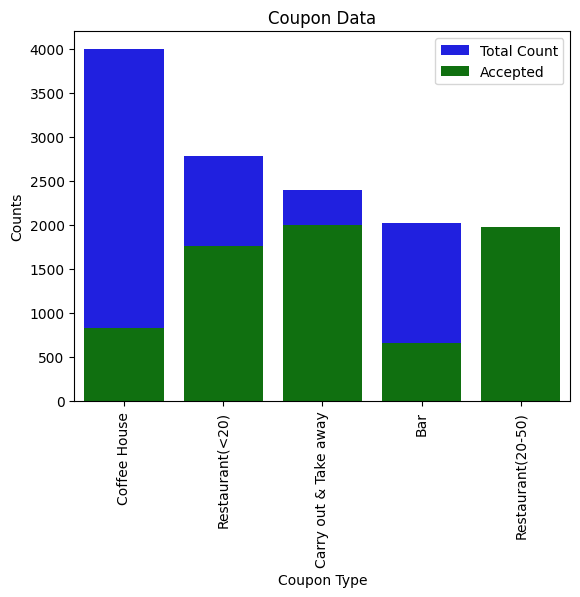

In [47]:
coupon_data = data[['coupon']].value_counts().reset_index()
coupon_data.rename(columns={'count': 'total_count'}, inplace=True)
coupon_data['accepted_count'] = data.query('Y == 1').groupby('coupon').count().reset_index()['Y']
print(coupon_data)
fig, ax = plt.subplots()
plt.xticks(rotation=90)

sns.barplot(x='coupon', y='total_count', data=coupon_data, color='blue', label='Total Count')
sns.barplot(x='coupon', y='accepted_count', data=coupon_data, color='green', label='Accepted')
plt.legend()
ax.set_xlabel('Coupon Type')
ax.set_ylabel('Counts')
ax.set_title('Coupon Data')


6. Use a histogram to visualize the temperature column.

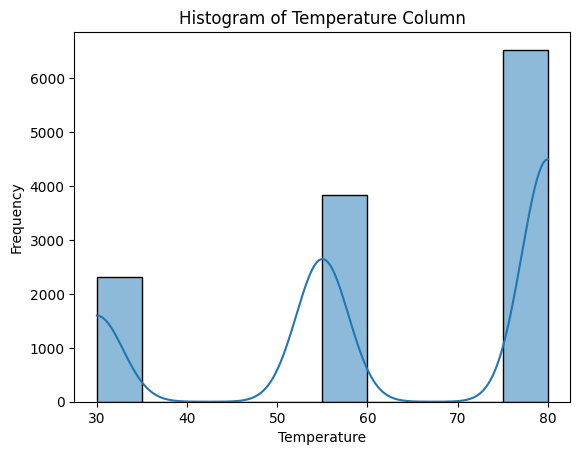

In [ ]:
sns.histplot(data['temperature'], bins=10, kde=True)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature Column')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [ ]:
bar_coupons = data[data['coupon'] == 'Bar']
bar_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [ ]:
portion_of_bar_coupons_accepted = bar_coupons[bar_coupons['Y'] == 1].shape[0] / bar_coupons.shape[0]
f"Proportion of bar coupons were accepted {portion_of_bar_coupons_accepted * 100 : .2f}%"

'Proportion of bar coupons were accepted  41.00%'

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [ ]:
bar_3_or_fewer_times = ['never', 'less1', '1~3']
bar_more_than_3 = ['4~8', 'gt8']
less_than_3_count = bar_coupons.query('Bar in @bar_3_or_fewer_times')
more_than_3_count = bar_coupons.query('Bar in @bar_more_than_3')
acceptance_rate_bar_3_or_fewer_times = less_than_3_count['Y'].mean()
acceptance_rate_bar_more_than_3 = more_than_3_count['Y'].mean()


print(f'Acceptance rate of those who went to a bar 3 or fewer times a month: {acceptance_rate_bar_3_or_fewer_times * 100 : .2f}%')
print(f'Acceptance rate of those who went to a bar more then 3 times a month: {acceptance_rate_bar_more_than_3 * 100 : .2f}%')





Acceptance rate of those who went to a bar 3 or fewer times a month:  37.07%
Acceptance rate of those who went to a bar more then 3 times a month:  76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [ ]:
age_grt_25 = ['46', '26', '31', '41', '50plus', '36']
bar_more_than_once = ['1~3', 'gt8', '4~8']
driver_who_go_to_bar_more_than_once_a_month_age_over_25 = bar_coupons.query('Bar in @bar_more_than_once and age in @age_grt_25')
driver_who_go_to_bar_more_than_once_a_month_age_over_25 = driver_who_go_to_bar_more_than_once_a_month_age_over_25[['Y', 'Bar', 'age']]
driver_who_go_to_bar_more_than_once_a_month_age_over_25
# Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others. Is there a difference?
acceptance_rate_age_grt25 = driver_who_go_to_bar_more_than_once_a_month_age_over_25['Y'].mean()
accpetance_rate_rest = bar_coupons.query('Bar not in @bar_more_than_once and age not in @age_grt_25')['Y'].mean()
print(f'Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25: {acceptance_rate_age_grt25 * 100 : .2f}%')
print(f'Acceptance rate rest: {accpetance_rate_rest * 100 : .2f}%')
print(f'Driver with age over 25 and and who go to bar more than once a month has Acceptance rate difference: {(acceptance_rate_age_grt25 - accpetance_rate_rest) * 100: .2f}%')

Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25:  69.52%
Acceptance rate rest:  39.33%
Driver with age over 25 and and who go to bar more than once a month has Acceptance rate difference:  30.19%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [ ]:
def get_unique_values(df_data, columns):
  for col in columns:
    print('column name: %s' % col)
    print(df_data[col].unique())
get_unique_values(data, ['coupon'])

column name: coupon
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']


In [ ]:
occupation_farming_fishing_or_forestry = ['Farming Fishing & Forestry']
bar_more_than_once_had_passenger = bar_coupons.query('Bar in @bar_more_than_once and has_children == 0 and occupation not in @occupation_farming_fishing_or_forestry')
bar_more_than_once_had_passenger[['Y', 'Bar', 'has_children', 'occupation']]
# get_unique_values(bar_more_than_once_had_passenger, ['Bar', 'has_children', 'occupation', 'Y'])
acceptance_rate_bar_more_than_once_had_passenger = bar_more_than_once_had_passenger['Y'].mean()
print(f'Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a '
      f'kid and had occupations other than farming, fishing, or forestry: {acceptance_rate_bar_more_than_once_had_passenger * 100 : .2f}%')

Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry:  70.19%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



Acceptance rate for drivers, go to bars more than once a month, had passengers that were not a kid, and were not widowed:  71.32
Acceptance rate for drivers, go to bars more than once a month and are under the age of 30:  72.17%
Acceptance rate for drivers, go to cheap restaurants more than 4 times a month and income is less than 50K:  45.35


Text(0.5, 1.0, 'Acceptance Rate of Bar Coupon')

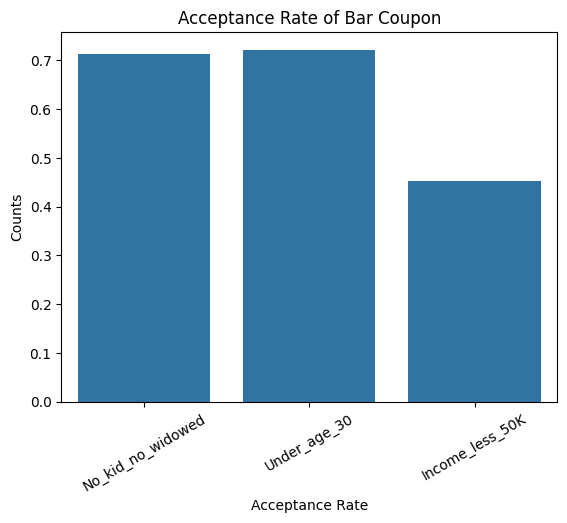

In [ ]:
# get_unique_values(bar_coupons, ['RestaurantLessThan20', 'income'])
age_under_30 = ['21', '26', 'below21']
income_less_than_50k = ['$37500 - $49999', '$12500 - $24999', '$25000 - $37499', 'Less than $12500']
cheap_resto_more_than_4_times = ['4~8', 'gt8']
more_than_once_a_month_had_not_a_kid_and_not_widowed = bar_coupons.query('Bar in @bar_more_than_once and passanger != "Kid(s)" and maritalStatus != "Widowed"')
acceptance_rate_more_than_once_a_month_had_not_a_kid_and_not_widowed = more_than_once_a_month_had_not_a_kid_and_not_widowed['Y'].mean()
acceptance_rate_more_than_once_a_month_under_age_30 = bar_coupons.query('Bar in @bar_more_than_once and age in @age_under_30')['Y'].mean()
acceptance_rate_cheap_restaurants_more_than_4_times_a_month_and_income_less_than_50K = bar_coupons.query(
    'RestaurantLessThan20 in @cheap_resto_more_than_4_times and income in @income_less_than_50k')['Y'].mean()

print('Acceptance rate for drivers, go to bars more than once a month, had passengers that were not a kid, and were not widowed: '
      f'{acceptance_rate_more_than_once_a_month_had_not_a_kid_and_not_widowed * 100 : .2f}')
print('Acceptance rate for drivers, go to bars more than once a month and are under the age of 30: '
      f'{acceptance_rate_more_than_once_a_month_under_age_30 * 100 : .2f}%')
print('Acceptance rate for drivers, go to cheap restaurants more than 4 times a month and income is less than 50K: '
      f'{acceptance_rate_cheap_restaurants_more_than_4_times_a_month_and_income_less_than_50K * 100 : .2f}')


acceptence_rate = {'No_kid_no_widowed': acceptance_rate_more_than_once_a_month_had_not_a_kid_and_not_widowed,
                   'Under_age_30': acceptance_rate_more_than_once_a_month_under_age_30,
                   'Income_less_50K': acceptance_rate_cheap_restaurants_more_than_4_times_a_month_and_income_less_than_50K}
plt.xticks(rotation=30)

sns.barplot(x=list(acceptence_rate.keys()), y=list(acceptence_rate.values()))
plt.xlabel('Acceptance Rate')
plt.ylabel('Counts')
plt.title('Acceptance Rate of Bar Coupon')


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Hypothesis:**

Drivers who frequent bars (more than once a month) and are not driving children are more likely to accept ride-sharing coupons. This also applies to young drivers (under 30 years old) who frequent bars.

**Reasoning:**

* **Data-driven observation:**  The provided data shows a high acceptance rate (76.88%) for coupons among drivers who visit bars more than three times a month. This suggests a correlation between bar visits and coupon acceptance.
* **Targeted demographic:**  Furthermore, the data indicates that drivers under 30 who frequent bars exhibit a strong coupon acceptance rate (72.17%). This highlights a specific demographic (young, bar-going drivers) with a higher propensity for using coupons.

This hypothesis suggests that targeting ride-sharing coupons towards drivers who frequent bars, particularly those under 30 and those who are not transporting children, could result in higher acceptance and usage rates.



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# 4. Check all coupon acceptance rate

Index(['coupon', 'Y', 0], dtype='object')
                       count  accepted  rejected  acceptance_rate
coupon                                                           
Carry out & Take away   2393      1760       633         0.735478
Restaurant(<20)         2786      1970       816         0.707107
Coffee House            3996      1995      2001         0.499249
Restaurant(20-50)       1492       658       834         0.441019
Bar                     2017       827      1190         0.410015


<ipython-input-43-1ad8f55f5cd1>:7: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  all_coupons = all_coupons.groupby('coupon').agg(sum)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: Fu

Text(0.5, 1.0, 'Acceptance Rate of All Coupons')

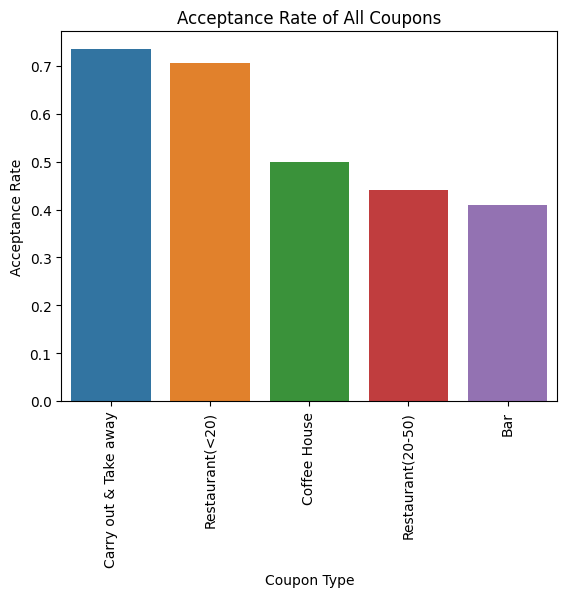

In [ ]:
all_coupons = data.groupby(['coupon', 'Y']).size()
all_coupons = all_coupons.reset_index()
print(all_coupons.columns)
all_coupons.rename(columns={0: 'count', 'Y': 'status'}, inplace=True)
all_coupons['accepted'] = all_coupons.apply(lambda x: x['count'] if x['status'] == 1 else 0, axis=1)
all_coupons['rejected'] = all_coupons.apply(lambda x: x['count'] if x['status'] == 0 else 0, axis=1)
all_coupons = all_coupons.groupby('coupon').agg(sum)
all_coupons.drop('status', axis=1, inplace=True)
all_coupons
all_coupons['acceptance_rate'] = all_coupons.apply(lambda x: x['accepted'] / (x['accepted'] + x['rejected']), axis=1)
all_coupons.sort_values(by='acceptance_rate', ascending=False, inplace=True)
print(all_coupons)
plt.xticks(rotation=90)
sns.barplot(data=all_coupons, x='coupon', y='acceptance_rate', hue='coupon')
plt.xlabel('Coupon Type')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate of All Coupons')

## 4.1 Carry out & Take away
From above it is clear that for "Carry out &Take away" the acceptance rate is really high. To maxmize further let see what is the best time to offer "Carry out &Take away" coupon.

['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
['2PM' '10AM' '6PM' '7AM' '10PM']
      count  accepted  rejected  acceptance_rate
time                                            
2PM     218       189        29         0.866972
6PM     435       359        76         0.825287
10PM    461       350       111         0.759219
10AM    517       363       154         0.702128
7AM     762       499       263         0.654856


<ipython-input-45-7c10b8ec6867>:8: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  coupons_carry_take_away = coupons_carry_take_away.groupby('time').agg(sum)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/se

Text(0.5, 1.0, 'Acceptance Rate of Coupon: Carry out & Take away')

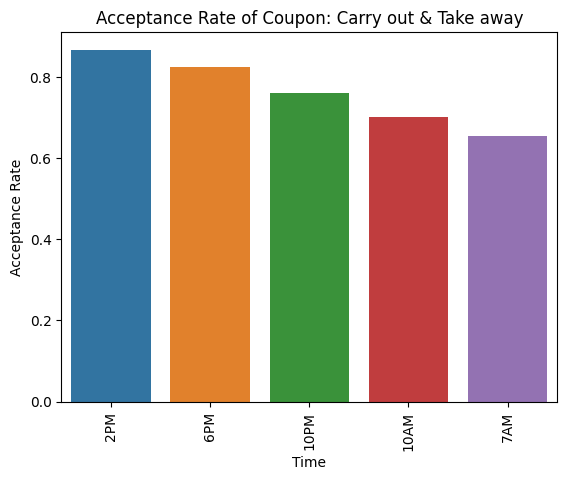

In [ ]:
print(data['coupon'].unique())
print(data['time'].unique())
coupons_carry_take_away = data.query('coupon == "Carry out & Take away"')
coupons_carry_take_away = coupons_carry_take_away.groupby(['time', 'Y']).size().reset_index()
coupons_carry_take_away.rename(columns={'Y': 'status', 0: 'count'}, inplace=True)
coupons_carry_take_away['accepted'] = coupons_carry_take_away.apply(lambda x: x['count'] if x['status'] == 1 else 0, axis=1)
coupons_carry_take_away['rejected'] = coupons_carry_take_away.apply(lambda x: x['count'] if x['status'] == 0 else 0, axis=1)
coupons_carry_take_away = coupons_carry_take_away.groupby('time').agg(sum)
coupons_carry_take_away.drop('status', axis=1, inplace=True)
coupons_carry_take_away['acceptance_rate'] = coupons_carry_take_away.apply(lambda x: x['accepted'] / (x['accepted'] + x['rejected']), axis=1)
coupons_carry_take_away.sort_values(by='acceptance_rate', ascending=False, inplace=True)
print(coupons_carry_take_away)
plt.xticks(rotation=90)
sns.barplot(data=coupons_carry_take_away, x='time', y='acceptance_rate', hue='time')
plt.xlabel('Time')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate of Coupon: Carry out & Take away')

### 4.1.1 Conclusion
To achieve the highest acceptance rate for "Carry out & Take away" coupons, it's optimal to offer them during lunch and dinner hours, as clearly demonstrated in the chart above.




# 4.2 Coupon type: Restaurant(<20)

In [ ]:
get_unique_values(data, ['coupon'])
income_more_than_50k = ['$62500 - $74999', '$75000 - $87499', '$50000 - $62499', '$100000 or More', '$87500 - $99999']
# group1: @age_less_than_30
# group2: @age_above_30
data_restaurant_less_20 = data.query('coupon == "Restaurant(<20)"')
group1 = data_restaurant_less_20.query('age in @age_under_30')
group1_acceptance_rate = group1['Y'].mean()


group2 = data_restaurant_less_20.query('age not in @age_under_30')
group2_acceptance_rate = group2['Y'].mean()

print(f'Drivers with age under 30 has acceptance rate of: {group1_acceptance_rate * 100 : .2f} %')
print(f'Drivers with age above 30 has acceptance rate of: {group2_acceptance_rate * 100 : .2f} %')



column name: coupon
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
Drivers with age under 30 has acceptance rate of:  73.61 %
Drivers with age above 30 has acceptance rate of:  68.32 %


### 4.2.1 Conclusion

To achieve the highest acceptance rate for "Restaurant(<20)" coupons, it's optimal to offer them to drivers  under age 30.



# 4.3 Coupon type: Coffee House

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

Text(0.5, 1.0, 'Acceptance Rate of Coupon: Coffee House')

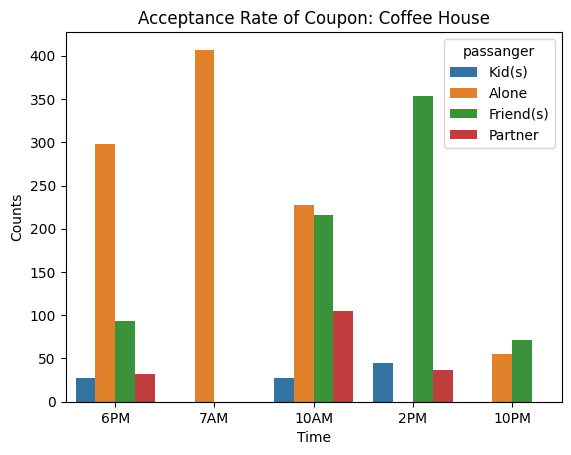

In [ ]:
# Acceptance rate for coupon type "Coffee House"
data_coffee_house = data.query('coupon == "Coffee House"')

# acceptance_rate_coffee = data_coffee_house['Y'].mean()
# print(f'Acceptance rate for "Coffee House" coupons: {acceptance_rate_coffee * 100 : .2f} %')

# Let see how timing affects the acceptance
data_coffee_house_and_time = data_coffee_house.query('Y == 1')
sns.countplot(data=data_coffee_house_and_time, x='time', hue='passanger')
plt.xlabel('Time')
plt.ylabel('Counts')
plt.title('Acceptance Rate of Coupon: Coffee House')


### 4.3.1 Conclusion
To maximize the acceptance rate for "Coffee House" coupons, it's recommended to target drivers with a friend as a passenger, particularly around 7AM or 10AM or during the afternoon (2PM) with passager as friends.